## 实验1 环境数据处理

编写代码实现如下功能

操作1.安装pandas、seaborn并下载环境数据；

操作2.读取csv文件后展示数据的统计信息；

操作3.PM2.5数据预处理；

操作4.PM2.5的数据分析；

操作5.PM2.5影响因素分析。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#导入数据，并将年月日时间解析为datetime，并设为index
#定义解析公式，datetime.strptime将对应字符串转成datetime
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y %m %d %H')
PM_Shanghai = pd.read_csv('./dataset/ShanghaiPM20100101_20151231.csv', parse_dates = {'date': ['year','month','day','hour']},date_parser=dateparse,index_col = 'date', keep_date_col = True)
PM_Shanghai.info()

C:\Users\Habsburg G.Qv\AppData\Local\Temp\ipykernel_4804\794870591.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y %m %d %H')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2010-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             52584 non-null  int64  
 1   year           52584 non-null  object 
 2   month          52584 non-null  object 
 3   day            52584 non-null  object 
 4   hour           52584 non-null  object 
 5   season         52584 non-null  int64  
 6   PM_Jingan      24700 non-null  float64
 7   PM_US Post     34039 non-null  float64
 8   PM_Xuhui       25189 non-null  float64
 9   DEWP           52571 non-null  float64
 10  HUMI           52571 non-null  float64
 11  PRES           52556 non-null  float64
 12  TEMP           52571 non-null  float64
 13  cbwd           52572 non-null  object 
 14  Iws            52572 non-null  float64
 15  precipitation  48575 non-null  float64
 16  Iprec          48575 non-null  float64
dtypes: float64(10),

In [3]:
PM_Shanghai.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
date,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
2010-01-01 01:00:00,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2010-01-01 02:00:00,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
2010-01-01 03:00:00,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
2010-01-01 04:00:00,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0


In [4]:
PM_Shanghai[PM_Shanghai.notnull()]

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
date,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
2010-01-01 01:00:00,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2010-01-01 02:00:00,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
2010-01-01 03:00:00,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
2010-01-01 04:00:00,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,52580,2015,12,31,19,4,86.0,82.0,90.0,-1.0,65.13,1035.0,5.0,NE,15.0,0.0,0.0
2015-12-31 20:00:00,52581,2015,12,31,20,4,83.0,93.0,86.0,1.0,70.27,1035.0,6.0,NE,19.0,0.0,0.0
2015-12-31 21:00:00,52582,2015,12,31,21,4,85.0,90.0,95.0,1.0,70.27,1036.0,6.0,NE,22.0,0.0,0.0


In [5]:
# 清洗行列索引
#  使用drop方法，删除无关列'No'
# =============== finish the missing code ===============
PM_Shanghai = PM_Shanghai.drop('No', axis=1)
# PM_Shanghai.head()

#  2013年之前没有PM数据，使用loc方法选择2013->2015年数据
# =============== finish the missing code ===============
PM_Shanghai = PM_Shanghai.loc[(PM_Shanghai['year'] > '2012') & (PM_Shanghai['year'] <= '2015')]
PM_Shanghai.head()


,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
2013-01-01 01:00:00,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
2013-01-01 02:00:00,2013,1,1,2,4,NaN,72.0,NaN,-5.0,69.00,1023.0,0.0,SW,63.0,0.0,0.0
2013-01-01 03:00:00,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
2013-01-01 04:00:00,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0


In [6]:
print(PM_Shanghai)

                     year month day hour  season  PM_Jingan  PM_US Post  \
date                                                                      
2013-01-01 00:00:00  2013     1   1    0       4       66.0        70.0   
2013-01-01 01:00:00  2013     1   1    1       4       67.0        76.0   
2013-01-01 02:00:00  2013     1   1    2       4        NaN        72.0   
2013-01-01 03:00:00  2013     1   1    3       4       73.0        78.0   
2013-01-01 04:00:00  2013     1   1    4       4       75.0        77.0   
...                   ...   ...  ..  ...     ...        ...         ...   
2015-12-31 19:00:00  2015    12  31   19       4       86.0        82.0   
2015-12-31 20:00:00  2015    12  31   20       4       83.0        93.0   
2015-12-31 21:00:00  2015    12  31   21       4       85.0        90.0   
2015-12-31 22:00:00  2015    12  31   22       4       83.0        86.0   
2015-12-31 23:00:00  2015    12  31   23       4        NaN        77.0   

                     PM_

In [7]:
#  对于'PM_Jingan','PM_US Post','PM_Xuhui'三列数据，部分缺失的情况，用三个值的平均值进行填充。使用fillna,  mean(),  T转置
# =============== finish the missing code ===============
# 选择三列数据
cols = ['PM_Jingan', 'PM_US Post', 'PM_Xuhui']
PM_Shanghai_sub = PM_Shanghai[cols]

# 使用 mean() 方法计算三列数据的平均值
mean_values = PM_Shanghai_sub.mean()

# 使用 fillna() 方法填充缺失值
PM_Shanghai_sub = PM_Shanghai_sub.fillna(mean_values)

# 将填充后的数据替换回原来表格
PM_Shanghai[cols] = PM_Shanghai_sub.values

# # 将填充后的数据转置
# PM_Shanghai = PM_Shanghai.T

# 打印处理后的数据
PM_Shanghai.head()


,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,2013,1,1,0,4,66.000000,70.0,71.000000,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
2013-01-01 01:00:00,2013,1,1,1,4,67.000000,76.0,72.000000,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
2013-01-01 02:00:00,2013,1,1,2,4,57.395992,72.0,57.678987,-5.0,69.00,1023.0,0.0,SW,63.0,0.0,0.0
2013-01-01 03:00:00,2013,1,1,3,4,73.000000,78.0,74.000000,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
2013-01-01 04:00:00,2013,1,1,4,4,75.000000,77.0,77.000000,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0


In [8]:
#  使用fillna方法，和method='ffill'属性，对缺失的值用前向填充，fillna(method = 'ffill')
# =============== finish the missing code ===============
# 缺失的值用前向填充法
PM_Shanghai[['PM_Jingan', 'PM_US Post', 'PM_Xuhui', 'TEMP','HUMI', 'DEWP']] = \
    PM_Shanghai[['PM_Jingan', 'PM_US Post', 'PM_Xuhui', 'TEMP','HUMI', 'DEWP']].fillna(method = 'ffill')

# 打印处理后的数据
PM_Shanghai.head()


,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,2013,1,1,0,4,66.000000,70.0,71.000000,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0
2013-01-01 01:00:00,2013,1,1,1,4,67.000000,76.0,72.000000,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0
2013-01-01 02:00:00,2013,1,1,2,4,57.395992,72.0,57.678987,-5.0,69.00,1023.0,0.0,SW,63.0,0.0,0.0
2013-01-01 03:00:00,2013,1,1,3,4,73.000000,78.0,74.000000,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0
2013-01-01 04:00:00,2013,1,1,4,4,75.000000,77.0,77.000000,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0


In [9]:
#年月日小时要转成int类型，否则出图是乱序的
PM_Shanghai.year = PM_Shanghai.year.astype(int)
PM_Shanghai.month = PM_Shanghai.month.astype(int)
PM_Shanghai.day = PM_Shanghai.day.astype(int)
PM_Shanghai.hour = PM_Shanghai.hour.astype(int)
#对数值型数据用describe()函数观察统计值，逻辑都是OK的
PM_Shanghai[['PM_Jingan','PM_US Post','PM_Xuhui','TEMP','HUMI','DEWP','Iws','PRES','Iprec','precipitation']].describe()

,PM_Jingan,PM_US Post,PM_Xuhui,TEMP,HUMI,DEWP,Iws,PRES,Iprec,precipitation
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26276.000000,26260.000000,24194.000000,24194.0000
mean,57.395992,53.543316,57.678987,17.728729,69.523277,11.501598,46.929708,1015.972963,1.048855,0.1474
std,46.162552,42.680031,47.397018,9.032351,18.036935,9.520911,66.790312,9.006366,7.787734,1.0705
min,1.000000,1.000000,1.000000,-3.000000,13.090000,-17.000000,0.000000,990.000000,0.000000,0.0000
25%,27.000000,27.000000,27.000000,10.000000,57.250000,4.000000,6.000000,1008.000000,0.000000,0.0000
50%,46.000000,42.000000,45.000000,19.000000,72.230000,12.000000,19.000000,1016.000000,0.000000,0.0000
75%,70.000000,66.000000,71.000000,25.000000,83.480000,20.000000,60.000000,1023.000000,0.000000,0.0000
max,635.000000,651.000000,636.000000,41.000000,100.000000,28.000000,615.000000,1040.000000,226.400000,61.6000


In [10]:
#使用weekday()方法将日期转成对应的周几
def getweekday(x):
    Week_Day = x.weekday()
    return Week_Day
PM_Shanghai['weekday'] = list(PM_Shanghai.reset_index().date.apply(getweekday))

# 涉及函数getweekend提取是否周末的信息，1为周末，0为工作日
def getweekend(x):
# =============== finish the missing code ===============
    # 如果星期六或星期日，则返回 1，否则返回 0
    if x == 5 or x == 6:
        Weekend = 1
    else:
        Weekend = 0
    
    return Weekend


PM_Shanghai['weekend'] = PM_Shanghai['weekday'].apply(getweekend)
PM_Shanghai['diff'] = PM_Shanghai['DEWP']-PM_Shanghai['TEMP']

# 打印处理后的数据
PM_Shanghai.head()


,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,weekday,weekend,diff
date,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,2013,1,1,0,4,66.000000,70.0,71.000000,-5.0,69.00,1023.0,0.0,SW,60.0,0.0,0.0,1,0,-5.0
2013-01-01 01:00:00,2013,1,1,1,4,67.000000,76.0,72.000000,-5.0,69.00,1023.0,0.0,SW,62.0,0.0,0.0,1,0,-5.0
2013-01-01 02:00:00,2013,1,1,2,4,57.395992,72.0,57.678987,-5.0,69.00,1023.0,0.0,SW,63.0,0.0,0.0,1,0,-5.0
2013-01-01 03:00:00,2013,1,1,3,4,73.000000,78.0,74.000000,-4.0,74.41,1023.0,0.0,SW,65.0,0.0,0.0,1,0,-4.0
2013-01-01 04:00:00,2013,1,1,4,4,75.000000,77.0,77.000000,-4.0,80.04,1023.0,-1.0,SW,68.0,0.0,0.0,1,0,-3.0


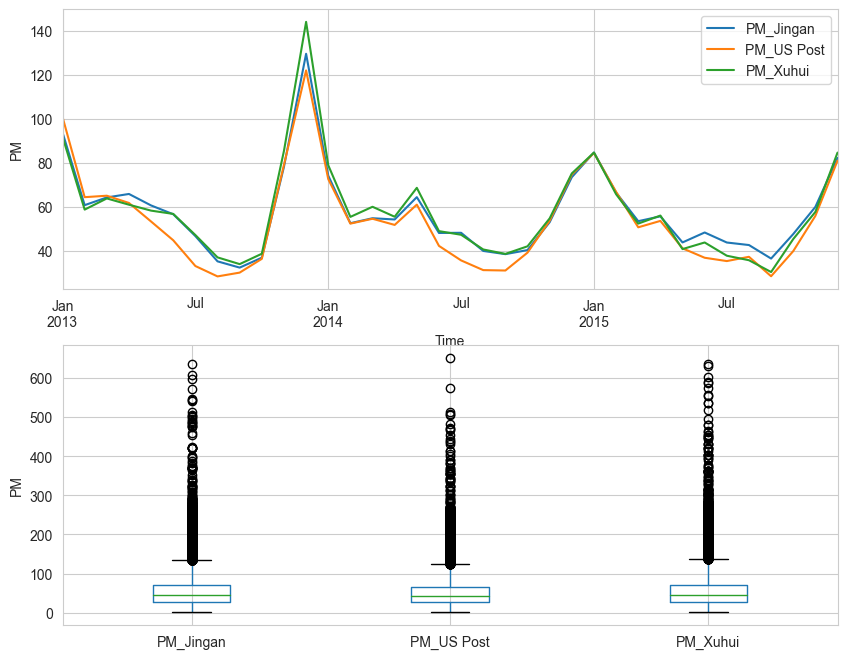

In [11]:
#首先观察三个地点的趋势
fig,axes = plt.subplots(2,1,figsize = (10,8))

# 1. 使用线形图观察三个地点的PM随时间的趋势
# =============== finish the missing code ===============
# for site in ['PM_Jingan', 'PM_US Post', 'PM_Xuhui']:
#     ax = PM_Shanghai[site].plot(ax=axes[0])
# ax.set_xlabel('Time')
# ax.set_ylabel('PM')

# for site in ['PM_Jingan', 'PM_US Post', 'PM_Xuhui']:
#     PM_Shanghai[site].rolling(window=7, center=True).mean().plot(ax=axes[0], label=site)
# axes[0].set_xlabel('Time')
# axes[0].set_ylabel('PM')
# axes[0].legend()

# 重采样，将数据降采样到每月数据
PM_Shanghai_monthly = PM_Shanghai.resample('M').mean()

# 绘制 A、B、C 三个地点的 PM 随时间的变化趋势
for site in ['PM_Jingan', 'PM_US Post', 'PM_Xuhui']:
    ax = PM_Shanghai_monthly[site].plot(ax=axes[0])
ax.set_xlabel('Time')
ax.set_ylabel('PM')
ax.legend(['PM_Jingan', 'PM_US Post', 'PM_Xuhui'])

# 2. 使用箱型图观察三个地点PM值的分布情况
# =============== finish the missing code ===============
PM_Shanghai.boxplot(column=['PM_Jingan', 'PM_US Post', 'PM_Xuhui'], ax=axes[1])
axes[1].set_ylabel('PM')

plt.show()


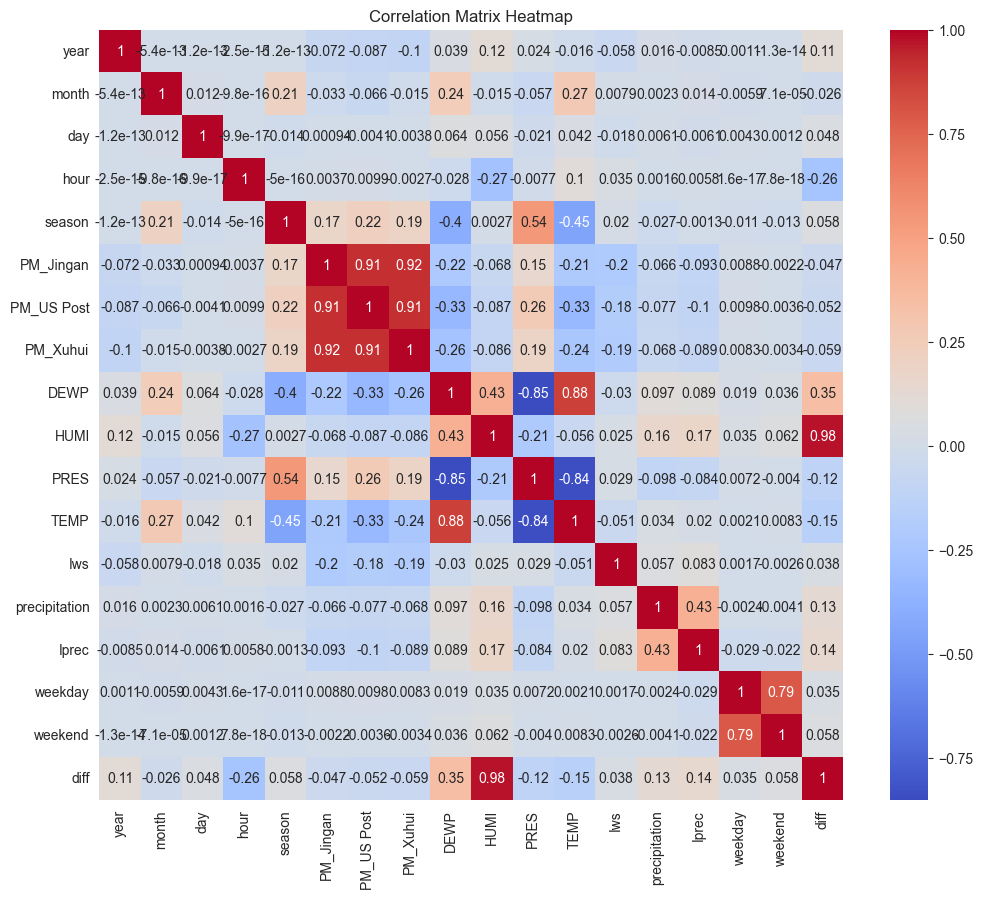

In [12]:
# 计算变量之间的相关性，病使用seaborn中的heatmap()画出热力图
PM_corr = PM_Shanghai.corr()
fig_heatmap = plt.figure(figsize = (12, 10))

# 3. 使用heatmap画出热力图
# =============== finish the missing code ===============
sns.heatmap(PM_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


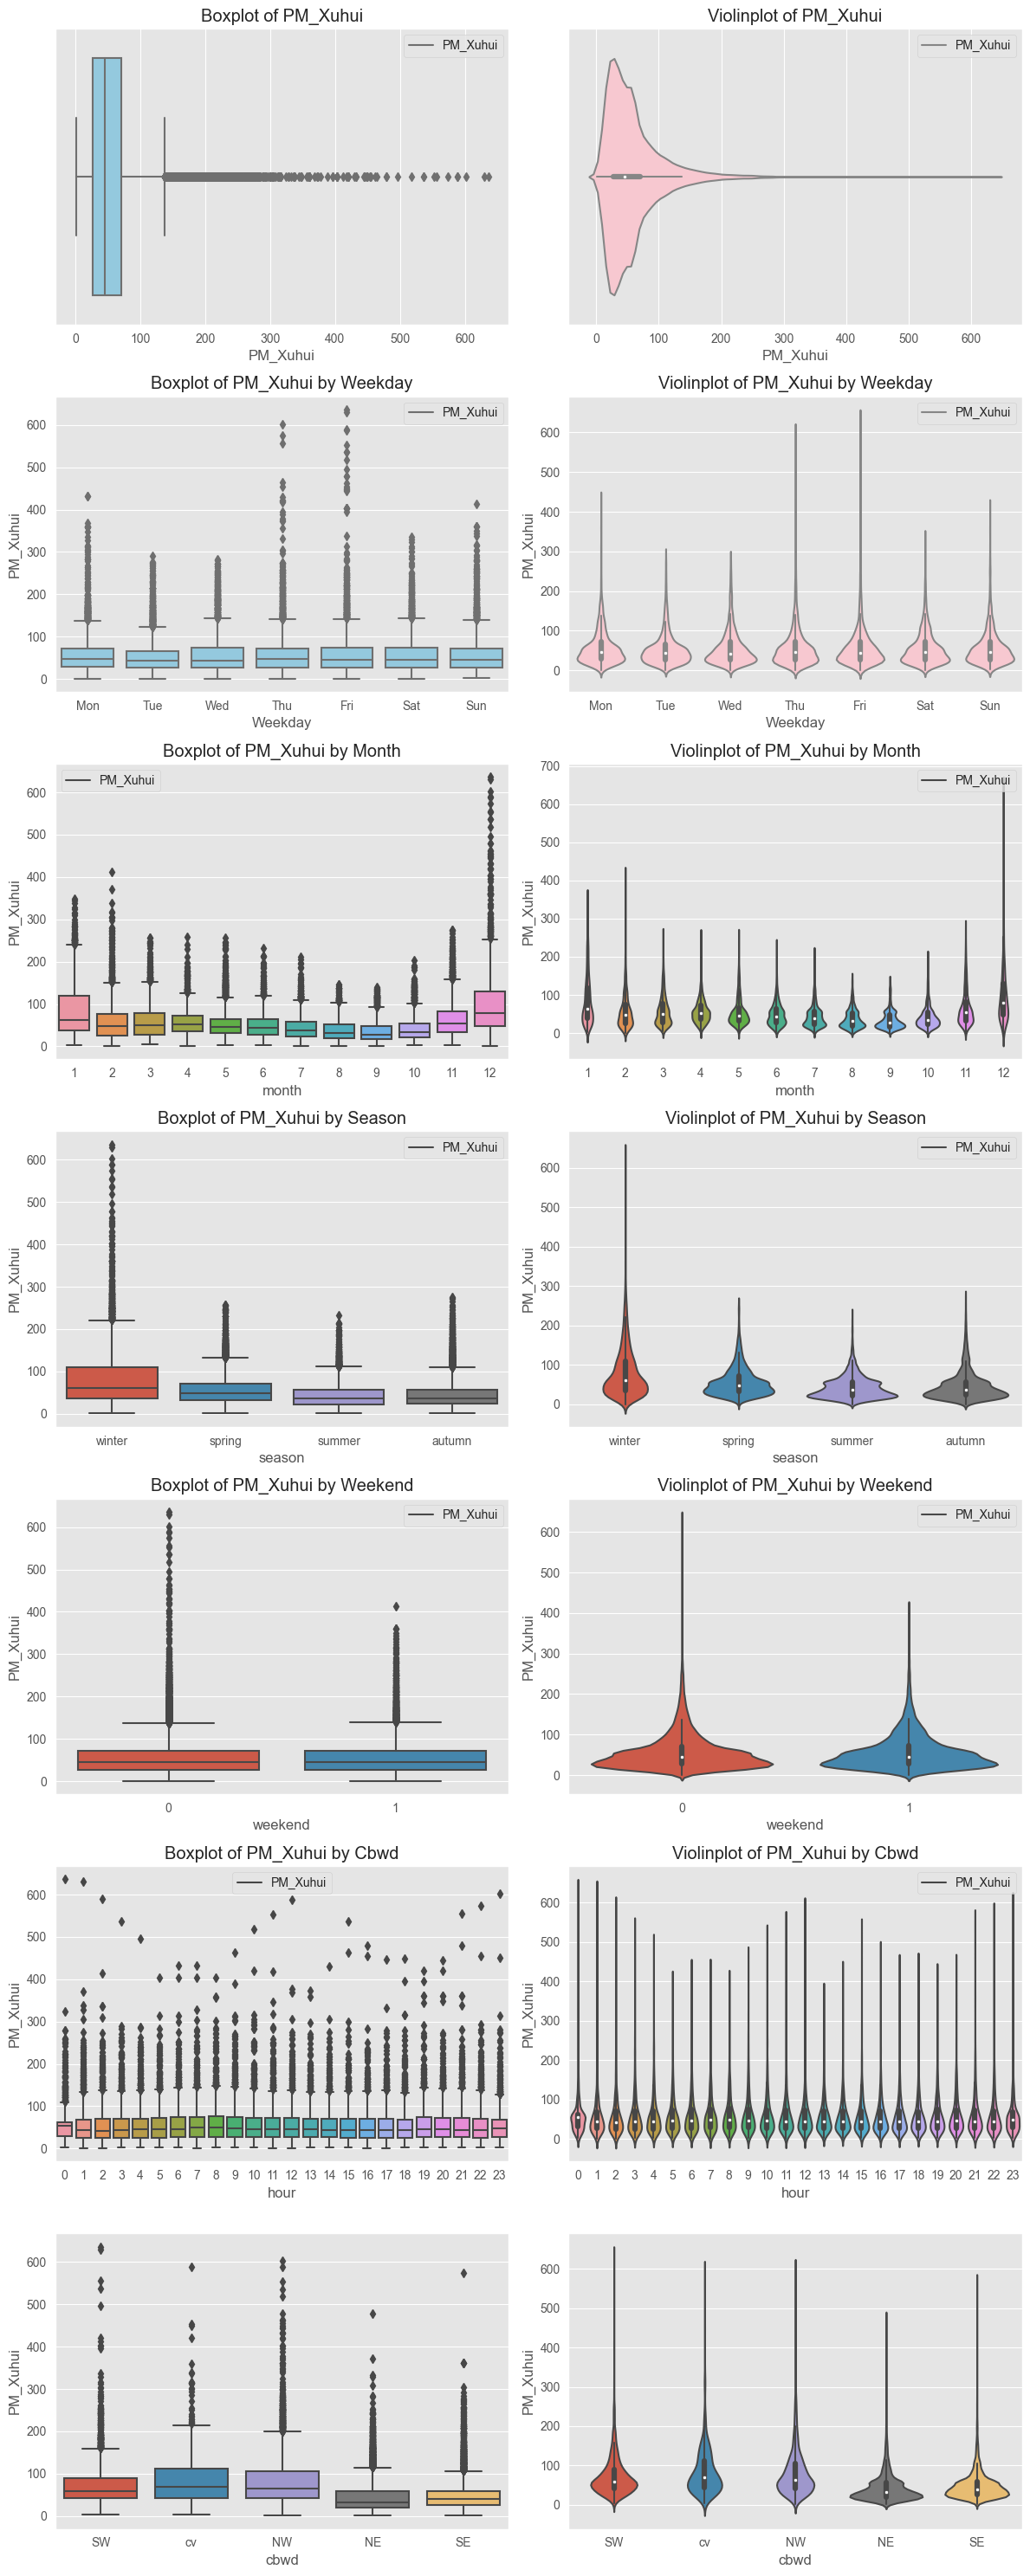

In [16]:
# 步骤5
# 分析个离散值对PM的影响。建议采用seaborn分别患处下面几种箱型图和小提琴图
# a. PM值的箱型图和小提琴图
# b. 周一到周日的PM箱型图和小提琴图
# c. 各月份PM箱型图和小提琴图
# d. 各季节PM箱型图和小提琴图
# e. 周末与否PM箱型图和小提琴图
# f. 各小时PM箱型图和小提琴图
# g. 各风向PM箱型图和小提琴图

# 定义一个将月份转化为季节的函数
def get_season(x):
    if x in [12, 1, 2]:
        return 'winter'
    elif x in [3, 4, 5]:
        return 'spring'
    elif x in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

# 新增一个season列，表示各个日期所在的季节
PM_Shanghai['season'] = PM_Shanghai['month'].apply(get_season)

#设置配色风格为ggplot，图片尺寸，标题字体
plt.style.use('ggplot')
fig_14 = plt.figure(figsize = (12,30))
fig_14.suptitle('',fontsize = 16, fontweight = 'bold')

# 绘制各子图，并设置标签及子标题
# =============== finish the missing code ===============
# a. PM值的箱型图和小提琴图
ax1 = fig_14.add_subplot(721)
sns.boxplot(x='PM_Xuhui', data=PM_Shanghai, ax=ax1, color='skyblue')
ax1.set_xlabel('PM_Xuhui')
ax1.set_title('Boxplot of PM_Xuhui')

ax2 = fig_14.add_subplot(722)
sns.violinplot(x='PM_Xuhui', data=PM_Shanghai, ax=ax2, color='pink')
ax2.set_xlabel('PM_Xuhui')
ax2.set_title('Violinplot of PM_Xuhui')

# b. 周一到周日的PM箱型图和小提琴图
ax3 = fig_14.add_subplot(723)
sns.boxplot(x='weekday', y='PM_Xuhui', data=PM_Shanghai, ax=ax3, color='skyblue')
ax3.set_xlabel('Weekday')
ax3.set_ylabel('PM_Xuhui')
ax3.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax3.set_title('Boxplot of PM_Xuhui by Weekday')

ax4 = fig_14.add_subplot(724)
sns.violinplot(x='weekday', y='PM_Xuhui', data=PM_Shanghai, ax=ax4, color='pink')
ax4.set_xlabel('Weekday')
ax4.set_ylabel('PM_Xuhui')
ax4.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax4.set_title('Violinplot of PM_Xuhui by Weekday')

# c. 各月份PM箱型图和小提琴图
ax5 = fig_14.add_subplot(725)
sns.boxplot(x='month', y='PM_Xuhui', data=PM_Shanghai, ax=ax5)
ax5.set_title('Boxplot of PM_Xuhui by Month')

ax6 = fig_14.add_subplot(726)
sns.violinplot(x='month', y='PM_Xuhui', data=PM_Shanghai, ax=ax6)
ax6.set_title('Violinplot of PM_Xuhui by Month')

# d. 各季节PM箱型图和小提琴图
ax7 = fig_14.add_subplot(727)
sns.boxplot(x='season', y='PM_Xuhui', data=PM_Shanghai, ax=ax7)
ax7.set_title('Boxplot of PM_Xuhui by Season')

ax8 = fig_14.add_subplot(728)
sns.violinplot(x='season', y='PM_Xuhui', data=PM_Shanghai, ax=ax8)
ax8.set_title('Violinplot of PM_Xuhui by Season')

# e. 周末与否PM箱型图和小提琴图
ax9 = fig_14.add_subplot(7,2,9)
sns.boxplot(x='weekend', y='PM_Xuhui', data=PM_Shanghai, ax=ax9)
ax9.set_title('Boxplot of PM_Xuhui by Weekend')

ax10 = fig_14.add_subplot(7,2,10)
sns.violinplot(x='weekend', y='PM_Xuhui', data=PM_Shanghai, ax=ax10)
ax10.set_title('Violinplot of PM_Xuhui by Weekend')

# f. 各小时PM箱型图和小提琴图
ax11 = fig_14.add_subplot(7,2,11)
sns.boxplot(x='hour', y='PM_Xuhui', data=PM_Shanghai, ax=ax11)
ax11.set_title('Boxplot of PM_Xuhui by Hour')

ax12 = fig_14.add_subplot(7,2,12)
sns.violinplot(x='hour', y='PM_Xuhui', data=PM_Shanghai, ax=ax12)
ax12.set_title('Violinplot of PM_Xuhui by Hour')

# g. 各风向PM箱型图和小提琴图
ax13 = fig_14.add_subplot(7,2,13)
sns.boxplot(x='cbwd', y='PM_Xuhui', data=PM_Shanghai, ax=ax13)
ax11.set_title('Boxplot of PM_Xuhui by Cbwd')

ax14 = fig_14.add_subplot(7,2,14)
sns.violinplot(x='cbwd', y='PM_Xuhui', data=PM_Shanghai, ax=ax14)
ax12.set_title('Violinplot of PM_Xuhui by Cbwd')

#设置图例
ax1.legend(['PM_Xuhui'], loc='best')
ax2.legend(['PM_Xuhui'], loc='best')
ax3.legend(['PM_Xuhui'], loc='best')
ax4.legend(['PM_Xuhui'], loc='best')
ax5.legend(['PM_Xuhui'], loc='best')
ax6.legend(['PM_Xuhui'], loc='best')
ax7.legend(['PM_Xuhui'], loc='best')
ax8.legend(['PM_Xuhui'], loc='best')
ax9.legend(['PM_Xuhui'], loc='best')
ax10.legend(['PM_Xuhui'], loc='best')
ax11.legend(['PM_Xuhui'], loc='best')
ax12.legend(['PM_Xuhui'], loc='best')

plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='cbwd', ylabel='Iws'>

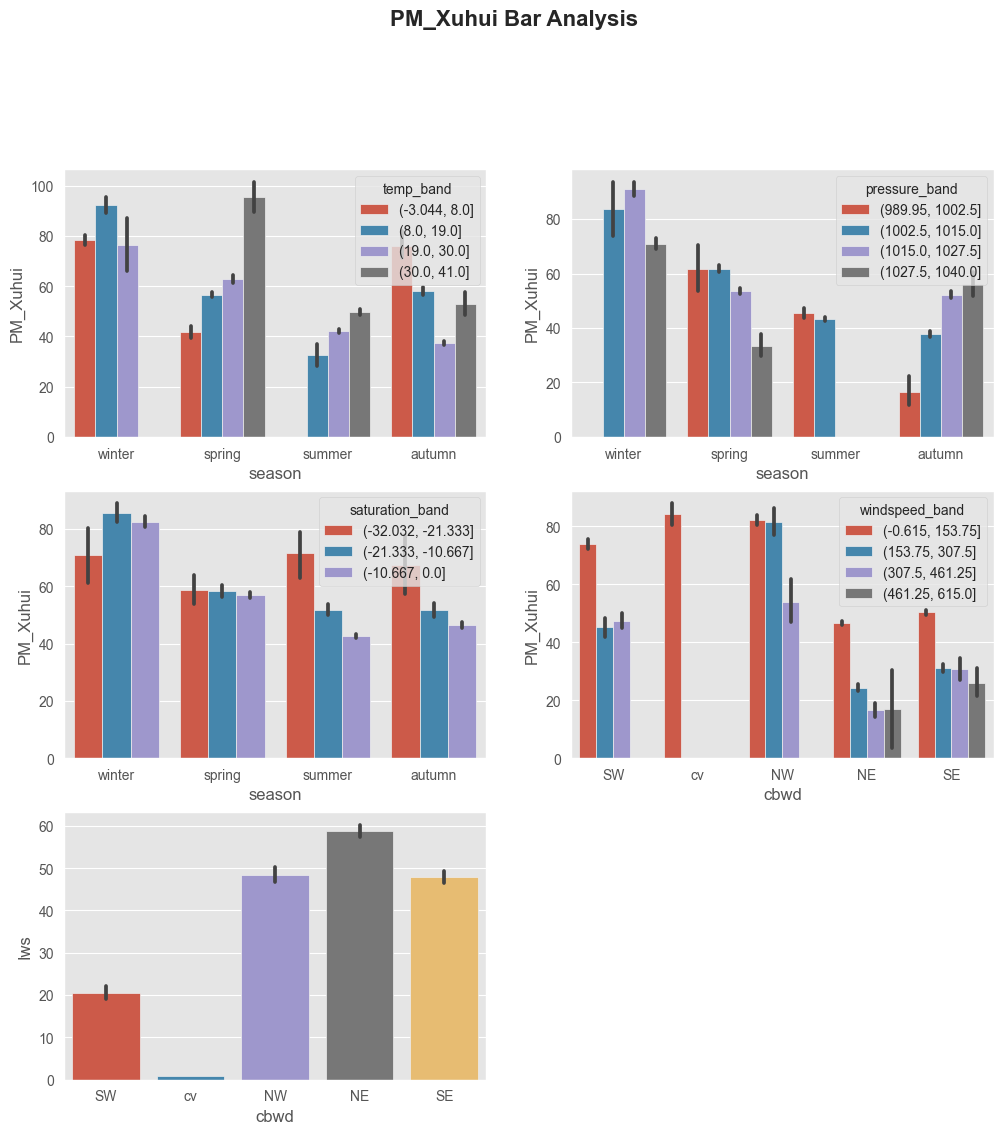

In [14]:
# 连续值对PM的影响分析
# 首先使用cut()函数将数据进行分段
PM_Shanghai['temp_band'] = pd.cut(PM_Shanghai.TEMP,4)
PM_Shanghai['pressure_band'] = pd.cut(PM_Shanghai.PRES,4)
PM_Shanghai['windspeed_band'] = pd.cut(PM_Shanghai.Iws,4)
PM_Shanghai['saturation_band'] = pd.cut(PM_Shanghai['diff'],3)

# 设置图片尺寸及大标题和字体
fig_PM = plt.figure(figsize = (12,16))
fig_PM.suptitle('PM_Xuhui Bar Analysis',fontsize = 16, fontweight = 'bold')

# 第一个子图，各季节温度对PM2.5的影响
ax1 = fig_PM.add_subplot(4,2,1)
sns.barplot(x = 'season', y = 'PM_Xuhui',hue = 'temp_band', data = PM_Shanghai)
# 第二个子图，各季节气压对PM2.5的影响
ax2 = fig_PM.add_subplot(4,2,2)
sns.barplot(x = 'season', y = 'PM_Xuhui',hue = 'pressure_band', data = PM_Shanghai)
# 第三个子图，各季节水汽饱和程度对PM2.5的影响
ax3 = fig_PM.add_subplot(4,2,3)
sns.barplot(x = 'season', y = 'PM_Xuhui',hue = 'saturation_band', data = PM_Shanghai)
# 第四个子图，各风向风速对PM2.5的影响
ax4 = fig_PM.add_subplot(4,2,4)
sns.barplot(x = 'cbwd', y = 'PM_Xuhui',hue = 'windspeed_band', data = PM_Shanghai)
# 第五个子图，各风向风速的平均值
ax5 = fig_PM.add_subplot(4,2,5)
sns.barplot(x = 'cbwd', y = 'Iws',data = PM_Shanghai)


C:\Users\Habsburg G.Qv\AppData\Local\Temp\ipykernel_4804\3031142627.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'month', y = 'PM_Xuhui',data = PM_Shanghai,ci = None)
C:\Users\Habsburg G.Qv\AppData\Local\Temp\ipykernel_4804\3031142627.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'hour', y = 'PM_Xuhui',hue = 'season', data = PM_Shanghai,ci = None)
C:\Users\Habsburg G.Qv\AppData\Local\Temp\ipykernel_4804\3031142627.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'hour', y = 'PM_Xuhui',hue = 'weekend', data = PM_Shanghai, ci = None)


<AxesSubplot:xlabel='hour', ylabel='PM_Xuhui'>

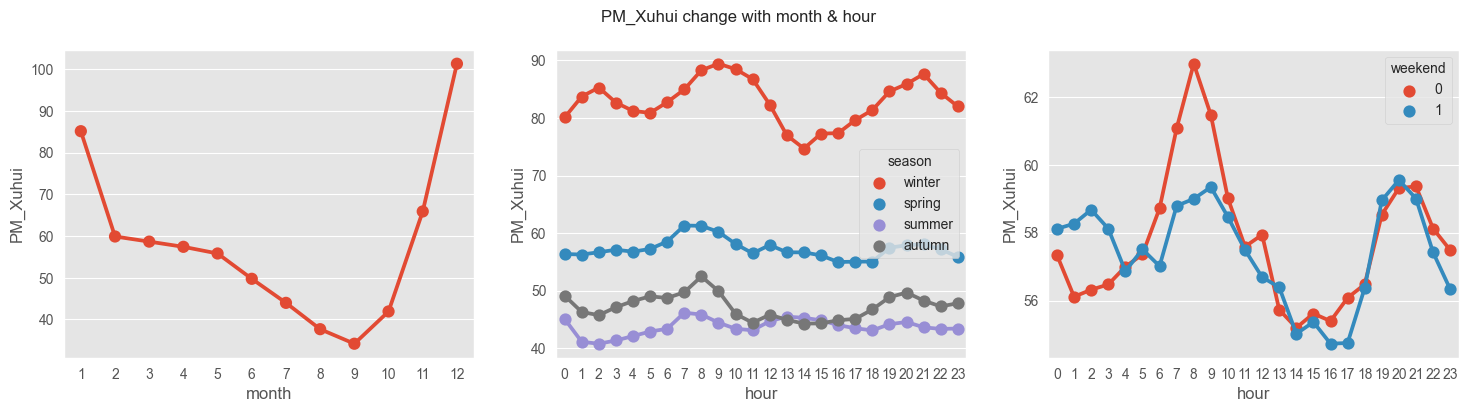

In [15]:
# PM浓度随月份及各时段的变换趋势
# 使用曲线分析PM在各月份和各时间段的变化趋势

fig_time = plt.figure(figsize = (18,4))
fig_time.suptitle('PM_Xuhui change with month & hour')

#各月份的PM2.5的平均值
ax_pm_month = fig_time.add_subplot(1,3,1)
sns.pointplot(x = 'month', y = 'PM_Xuhui',data = PM_Shanghai,ci = None)

#各季节下各时段的PM2.5平均值
ax_pm_season = fig_time.add_subplot(1,3,2)
sns.pointplot(x = 'hour', y = 'PM_Xuhui',hue = 'season', data = PM_Shanghai,ci = None)

#周末与否各时段的PM2.5平均值
ax_pm_weekend = fig_time.add_subplot(1,3,3)
sns.pointplot(x = 'hour', y = 'PM_Xuhui',hue = 'weekend', data = PM_Shanghai, ci = None)

#ci默认为95%置信区间，sd代表数据的标准差（不是均值的标准差）可以看出早上8点附近及晚上8点附近有高峰，通勤导致空气PM2.5增加。周末早高峰不明显